# **Projet Machine learning optimisation - ISE3**      

<div style="border: 2px solid #e74c3c; padding: 10px; border-radius: 5px; text-align: center; background-color: #fdecea; color: #c0392b; font-weight: bold;">
Descente de gradient Vs Newton
</div>

****
**MEMBRE DU GROUPE**
* 
* ANATO Diane
* NSIMOUESSA Dieuveil Nathan

## <div id=A style="color:black;display:fill;border-radius:5px;background-color:rgb(102, 102, 102);overflow:hidden"><p style="padding:20px;color:white;overflow:hidden;font-size:100%;margin:0;text-align:center;font-family: cursive;">TABLE DES MATIERES</p></div>


- <a href='#'>Introduction et présentation de la base de données du Digit</a> 
- <a href='#1'>1.Importation de la base de données et quelque statisques descriptives</a> 
    - <a href='#1.1'>1.1. Importation de la base de données</a> 
   
    
- <a href='#2'>2. Traitement des données manquantes</a> 

- <a href='#3.'>3. Modélisation</a> 
    - <a href='#3.1'>3.1. Contruction du modèle et optimisation par descente de gradient et Newton</a> 
    - <a href='#B.3.2'>3.3. Convergence de la méthode de Newton et convergence de la descente de gradient</a> 
    
- <a href='#concl'>Conclusion</a> 

## <div id=A style="color:white;display:fill;border-radius:5px;background-color:lightskyblue;overflow:hidden"><p style="padding:20px;color:white;overflow:hidden;font-size:100%;margin:0;text-align:center"> Introduction et présentation de la base de données Digit </p></div>

Le dataset Digits est un ensemble de données bien connu utilisé dans des applications de classification, en particulier dans le domaine de la reconnaissance de chiffres manuscrits.

Voici les principales caractéristiques :

Le dataset contient 1797 images de chiffres.
Chaque image est de taille 8x8 pixels, ce qui donne un total de 64 caractéristiques par image.
Les valeurs des pixels sont des entiers entre 0 et 16, représentant l'intensité des pixels (0 étant noir et 16 étant blanc).
La variable cible est un entier correspondant au chiffre représenté par l'image (par exemple, 0, 1, 2, ..., 9).

## <div id=A style="color:white;display:fill;border-radius:5px;background-color:lightskyblue;overflow:hidden"><p style="padding:20px;color:white;overflow:hidden;font-size:100%;margin:0;text-align:center">1.Importation de la base de données et quelque statisques descriptives </p></div>

> #  1.1. Importation de la base de données

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from utils import sigmoid, logistic_cost, logistic_gradient,logistic_hessian, logistic_gradient_descent,logistic_newton_method

# Charger le dataset MNIST ou un dataset de chiffres
from sklearn import datasets

# MNIST n'est pas directement dans sklearn, mais sklearn permet de charger un dataset de chiffres pour exemple
digits = datasets.load_digits()
X = digits.data
y = digits.target


## <div id=A style="color:white;display:fill;border-radius:5px;background-color:lightskyblue;overflow:hidden"><p style="padding:20px;color:white;overflow:hidden;font-size:100%;margin:0;text-align:center">2. Traitement des données </p></div>

In [2]:
# Convertir y en binaire (juste pour simplifier le problème)
y = (y == 0).astype(int)  # Prédire si le chiffre est 0 ou non (classification binaire)

# Diviser les données en entraînement et test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Normalisation des données
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## <div id=A style="color:white;display:fill;border-radius:5px;background-color:lightskyblue;overflow:hidden"><p style="padding:20px;color:white;overflow:hidden;font-size:100%;margin:0;text-align:center">3. Modélisation </p></div>

> #  3.1. Contruction du modèle et optimisation par descente de gradient et Newton

In [3]:
theta_gd_1, cost_gd_1 = logistic_gradient_descent(X_train, y_train, alpha=0.1, max_iter=100)
theta_gd_2, cost_gd_2 = logistic_gradient_descent(X_train, y_train, alpha=0.01, max_iter=100)
theta_gd_3, cost_gd_3 = logistic_gradient_descent(X_train, y_train, alpha=0.001, max_iter=100)
theta_gd_4, cost_gd_4 = logistic_gradient_descent(X_train, y_train, alpha=0.0001, max_iter=100)
theta_gd_5, cost_gd_5 = logistic_gradient_descent(X_train, y_train, alpha=0.00001, max_iter=100)


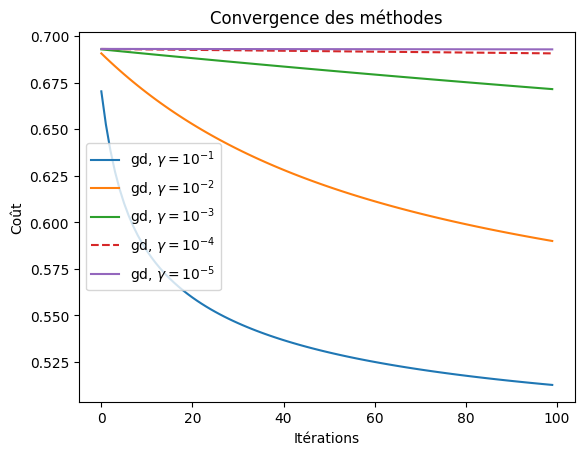

In [4]:
plt.plot(cost_gd_1, label="gd, $\gamma = 10^{-1}$")
plt.plot(cost_gd_2, label="gd, $\gamma = 10^{-2}$")
plt.plot(cost_gd_3, label="gd, $\gamma = 10^{-3}$")
plt.plot(cost_gd_4, label="gd, $\gamma = 10^{-4}$", linestyle='--')
plt.plot(cost_gd_5, label="gd, $\gamma = 10^{-5}$")
#plt.plot(costs_gd_6, label="gd, $\gamma = 10^{-6}$", linestyle='..')
plt.xlabel('Itérations')
plt.ylabel('Coût')
plt.title('Convergence des méthodes')
plt.legend()
plt.show()

La méthode de descente converge plus rapidement quand le learning rate est  0,01.

> # 3.2. Convergence de la méthode de Newton et convergence de la descente de gradient

In [5]:
# 1. Appliquer la méthode de la descente de gradient
theta_gd, cost_gd = logistic_gradient_descent(X_train, y_train, alpha=0.01, max_iter=100)

# 2. Appliquer la méthode de Newton
theta_newton, cost_newton = logistic_newton_method(X_train, y_train, max_iter=100)

Erreur lors de l'inversion de la Hessienne.


On remarque la matrice hessienne n'est pas inversible, ainsi l'application de la méthode de Newton ne serait possible

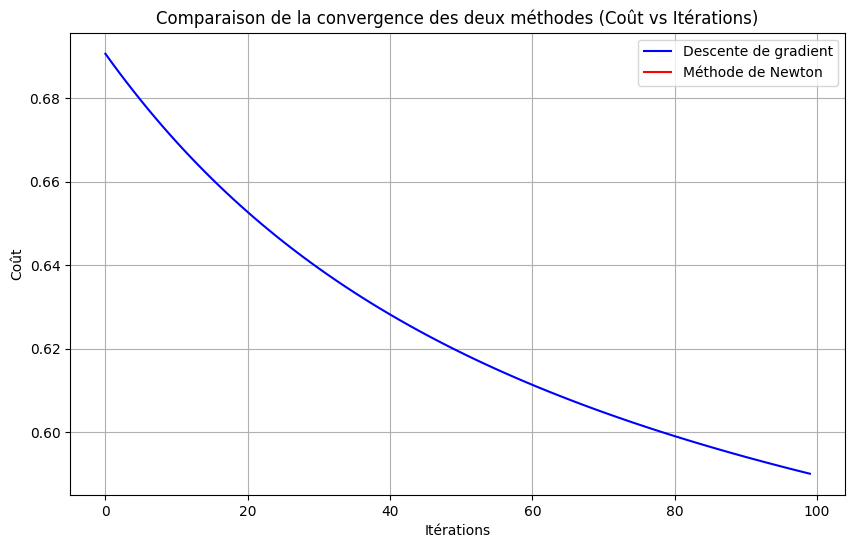

In [6]:
# Tracer la convergence des deux méthodes (coût vs itérations)
plt.figure(figsize=(10, 6))
plt.plot(cost_gd, label='Descente de gradient', color='blue')
plt.plot(cost_newton, label='Méthode de Newton', color='red')
plt.xlabel('Itérations')
plt.ylabel('Coût')
plt.legend()
plt.title('Comparaison de la convergence des deux méthodes (Coût vs Itérations)')
plt.grid(True)
plt.show()

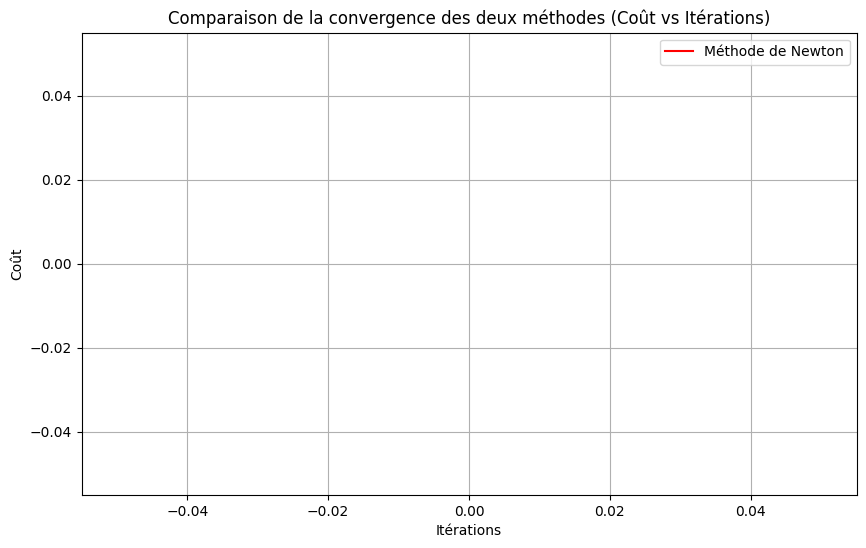

In [7]:
# Tracer la convergence des deux méthodes (coût vs itérations)
plt.figure(figsize=(10, 6))
#plt.plot(cost_gd, label='Descente de gradient', color='blue')
plt.plot(cost_newton, label='Méthode de Newton', color='red')
plt.xlabel('Itérations')
plt.ylabel('Coût')
plt.legend()
plt.title('Comparaison de la convergence des deux méthodes (Coût vs Itérations)')
plt.grid(True)
plt.show()

In [8]:
# Fonction de prédiction
def predict(theta, X):
    return (sigmoid(X.dot(theta)) >= 0.5).astype(int)

# Précision sur les données de test pour chaque méthode
y_pred_gd = predict(theta_gd, X_test)
#y_pred_newton = predict(theta_newton, X_test)

accuracy_gd = accuracy_score(y_test, y_pred_gd)
#accuracy_newton = accuracy_score(y_test, y_pred_newton)

print(f"Précision avec la descente de gradient : {accuracy_gd:.4f}")
#print(f"Précision avec la méthode de Newton : {accuracy_newton:.4f}")

Précision avec la descente de gradient : 0.6722
